In [1]:
import numpy as np 
import pandas as pd

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, T5ForConditionalGeneration

import torch.nn as nn
from tensorflow.keras import activations, optimizers, losses


2024-04-22 03:44:41.377269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-22 03:44:41.377390: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-22 03:44:41.668486: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
if torch.cuda.is_available():
    # Get GPU device name
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU: {gpu_name}")
else:
    print(":( no gpu for u)")

GPU: Tesla T4


In [4]:
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rut5-small")
model = AutoModelForSeq2SeqLM.from_pretrained("cointegrated/rut5-small")
# tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")
# model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

tokenizer_config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/640k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:515: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


model.safetensors:   0%|          | 0.00/259M [00:00<?, ?B/s]

MT5ForConditionalGeneration(
  (shared): Embedding(20100, 512)
  (encoder): MT5Stack(
    (embed_tokens): Embedding(20100, 512)
    (block): ModuleList(
      (0): MT5Block(
        (layer): ModuleList(
          (0): MT5LayerSelfAttention(
            (SelfAttention): MT5Attention(
              (q): Linear(in_features=512, out_features=384, bias=False)
              (k): Linear(in_features=512, out_features=384, bias=False)
              (v): Linear(in_features=512, out_features=384, bias=False)
              (o): Linear(in_features=384, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 6)
            )
            (layer_norm): MT5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): MT5LayerFF(
            (DenseReluDense): MT5DenseGatedActDense(
              (wi_0): Linear(in_features=512, out_features=1024, bias=False)
              (wi_1): Linear(in_features=512, out_features=1024, bias=False)
            

In [5]:
id_checkers=['()','[','&', '$', '{', '}', '\\', '^']
for item in id_checkers:
    print(tokenizer.vocab[item])

2660
765
546
1279
596
1354
540
3430


In [7]:
for item in id_checkers:
    print(tokenizer.vocab[item])

2660
765
546
1279
596
1354
540
3430


In [8]:
df_l = pd.read_parquet('/kaggle/input/final-finetuning-dataset/FIRST_PROPER_DF.parquet').sample(frac=1)

In [9]:
df= df_l

In [10]:
df.sample(10)

,output_texts,input_texts,tags
128630,"Вы знаете, что если $x<y$, то $g(x)>g(y)$. Тог...","Вы знаете, что если $ хэ < игрик $, то $ жи ( ...","['calculus', 'functions']"
256357,$$G(\vec r|\vec r'=0)=\frac i4 \left(\frac{kr}...,$$ жи прописная скобки открываются \vec эр |...,None
160599,"$$\r\n\theta = 0,2\pi/n,4\pi/n,\dots,(n-1)2\pi...","$$\r\n тета строчная равняетсяя 0,2 пи / эн ...",None
140547,"**(a)** Здесь необходимо доказать, что если $A...","**(a)** Здесь необходимо доказать, что если $A...","['elementary-set-theory', 'binary-operations']"
189770,$$ \bbox[lightyellow] { \r\n\eqalign{\r\n & ...,$$ \bbox[lightyellow кваёратная скобка закрыва...,None
163626,$$\color{red}{ x^4 + x^2 y^2 + y^4 = x^3 + x^2...,$$\color{red}{ хэ ^4 плюс икс ^2 у в сте...,None
103564,Это связано с пустым множеством: любой предика...,Это связано с пустым множеством: любой предика...,"['real-analysis', 'analysis', 'limits']"
82532,"Без индукции проще: просто заметим, что каждое...","Без индукции проще: просто заметим, что каждое...","['discrete-mathematics', 'proof-writing', 'ind..."
65658,Изоповерхности гладкой функции регулярного зна...,Изоповерхности гладкой функции регулярного зна...,"['calculus', 'multivariable-calculus', 'vector..."
279262,"$$\mathrm{Res}[f,0]=\lim_{z->0}\frac{1}{2!}[z ...","$$ mathru Res}[ эф,0 квадраатная ск обка закры...",None


In [11]:
# размер контекстного окна определяется медианой длины входных текстов
med_len = df['output_texts'].str.len().median()

In [12]:
class CustomDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=int(med_len)):
        df.reset_index(drop=True, inplace=True)
        self.outputs = df["output_texts"]
        self.inputs = df["input_texts"]
        self.tokenizer = tokenizer
        self.max_len=max_len

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, index):
        # для t5-small
        item = {}
        #print(index)
        
        inputs = self.tokenizer(self.inputs[index],return_tensors='pt',
                                padding='max_length',truncation=True,
                                return_attention_mask=True,max_length=self.max_len)
        outputs = self.tokenizer(self.outputs[index],return_tensors='pt',
                                 padding='max_length',truncation=True, 
                                 return_attention_mask=True,max_length=self.max_len)
        
        item['input_ids'] = inputs['input_ids'].squeeze().to(device)
        item['attention_mask'] = inputs['attention_mask'].squeeze().to(device)
        item['labels'] = outputs['input_ids'].squeeze().to(device)
        return item

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from rapidfuzz.distance import Levenshtein

In [15]:
def repl_none(line):
    if not line:
        return "['None']"
    return line
df['tags'] = df['tags'].apply(repl_none)

In [16]:
df.sample(5)

,output_texts,input_texts,tags
249637,$$\r\n\left( {\matrix{\r\n x \cr \r\n y ...,$$\r\n left круглая скобка { matrix{\r\n х...,['None']
115842,Отсортируйте вершины по координате $z$. Некото...,Отсортируйте вершины по координате $ зет $. Не...,"['geometry', 'algebraic-geometry', 'euclidean-..."
27251,"В отличие от комментариев, теория категорий зн...","В отличие от комментариев, теория категорий зн...","['reference-request', 'category-theory', 'homo..."
114677,Начнём с определения сходимости: поскольку $\{...,Начнём с определения сходимости: поскольку $\{...,"['real-analysis', 'convergence', 'optimization']"
109153,"$\vee$ означает «ИЛИ», а $\wedge$ означает «И»...","$\vee$ означает «ИЛИ», а $ wedge$ означает «И»...","['logic', 'propositional-calculus', 'predicate..."


In [17]:
import matplotlib.pyplot as plt

In [18]:
df.reset_index(inplace=True,drop=True)

In [19]:
df.head(3)

,output_texts,input_texts,tags
0,$$1x + \frac{5}{3}y = 7 \to x + \frac{5}{3}*3 ...,$$1 икс плюс 5 делить на 3 игрик равняется...,['None']
1,Пусть $A$ и $C$ — общее количество кандидатов ...,Пусть $A$ и $C$ — общее количество кандидатов ...,['probability']
2,"$$\langle G,\psi\rangle=\int_{\mathbb{R}}F_{0}...","$$ langle G, пси rangle= определённый интегра...",['None']


In [20]:
from ast import literal_eval

In [21]:
# находим уникальные теги
def get_unique_tags(df):
    uniques={}
    for tags in zip(df['tags']):
        # tags это тьюплы с одним элементом -- листом в виде строки
        # т.ч. сначала эту строку достаём
        # а потом literal_eval для того чтобы это было уже обычным листом
        for tag in literal_eval(tags[0]):
            if tag in uniques:
                uniques[tag]+=1
            else: uniques[tag]=1
    return uniques

In [22]:
un=get_unique_tags(df)
len(un)

1622

In [23]:
# если хотя бы в 2% записей этот тэг есть
major_tags={key:value for key,value in un.items() if value>(len(df)/50)}

In [24]:
major_tags

{'None': 195881,
 'probability': 9431,
 'calculus': 16396,
 'integration': 7641,
 'linear-algebra': 12487,
 'real-analysis': 15907,
 'sequences-and-series': 8168,
 'limits': 6992}

In [25]:
from statistics import median, mean

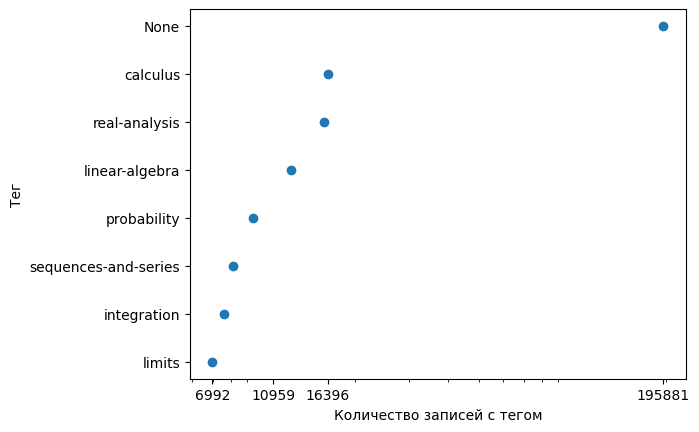

In [26]:
lists = sorted(major_tags.items(),key=lambda x:x[1]) 

y, x = zip(*lists)

fig, ax = plt.subplots()
ax.yaxis.set_tick_params(labelsize=10) 
plt.scatter(x, y)
plt.xlabel('Количество записей с тегом')
plt.ylabel('Тег')
plt.xscale('log')
ticks = [min(major_tags.values()),round(median(major_tags.values())), lists[-2][1], max(major_tags.values())] 
tick_labels = [f'{val}' for val in ticks]

plt.xticks(ticks, tick_labels)
plt.show()

In [28]:
# можно заметить, что много тегов у которых 1-2 использования
# из разряда 'book recommendations'
# в целом можно сделать так
# None --> оставить None (формулы вне текстов)
# если среди тегов есть популярные
# то оставлять наиболее популярный 
# а если нет --> тэгать как 'Разное' ('Other')

In [29]:
major_tags

{'None': 195881,
 'probability': 9431,
 'calculus': 16396,
 'integration': 7641,
 'linear-algebra': 12487,
 'real-analysis': 15907,
 'sequences-and-series': 8168,
 'limits': 6992}

In [30]:
def reassign_tags(line, major_tags):
    line = literal_eval(line)
    
    # если тегов нет
    if not line:
        return 'None'
    
    # смотрим есть ли у нас хотя бы один популярный тег
    populars = set(line).intersection(major_tags.keys())
    
    # если нет то тегаем как 'Разное'
    if not populars:
        return 'Other'
    # а если да - тегаем Самым популярным
    else:
        most_popular = max(populars, key=lambda tag: major_tags[tag])
        return most_popular


In [31]:
df['tags'] = df['tags'].apply(reassign_tags, args=[major_tags])

In [32]:
df.sample(10)

,output_texts,input_texts,tags
103744,$$A_n=||\int_{-\pi}^{\pi}e^{ix}\cos(nx)dx||=||...,$$A эн равно ||определённый интеграл от мин...,None
301260,$\int f(x)\mu(dx)$ — еще одно стандартное (но ...,$\int эф (x) мю (dx скобки закрываются $ — ещ...,integration
248928,Ключевым моментом является равенство:\r\n\r\n$...,Ключевым моментом является равенство:\r\n\r\n$...,Other
173001,$fg=(f_1+f_2+f_3)(g_1+g_2+g_3)=f_1g_1+f_1g_2+f...,$fg равняется ( фэ с индексом 1+ эф _2+ фэ с ...,None
294725,"$$\operatorname{Hom}_D(Y\otimes^L X,Z)=\operat...",$$\operatorname{Hom} дэ большая ( игрик проп...,None
157244,$$\overline{I(a)}=\int_{-\infty}^\infty \frac{...,$$\overlineЗ ай большая ( эй скоАЬазакрываетс...,None
201319,$$\dfrac{2x}{y}dx-\dfrac{1+x^2+x^2y^2}{y^2(1+y...,$$\dfrac{ 2 икс {y dx минус \dfrac{1+ х в сте...,None
293428,\begin{equation}\r\nx \equiv a^n \mod p\r\n\en...,\begin equation}\r\n х эквивалентно а ^эн ...,None
253024,"Если вы собираетесь интегрировать по факторам,...","Если вы собираетесь интегрировать по факторам,...",integration
160470,(Не нематематический)\r\n\r\nВ $n$-мерном вект...,(Не нематематический)\r\n\r\nВ эн $-мерном в...,Other


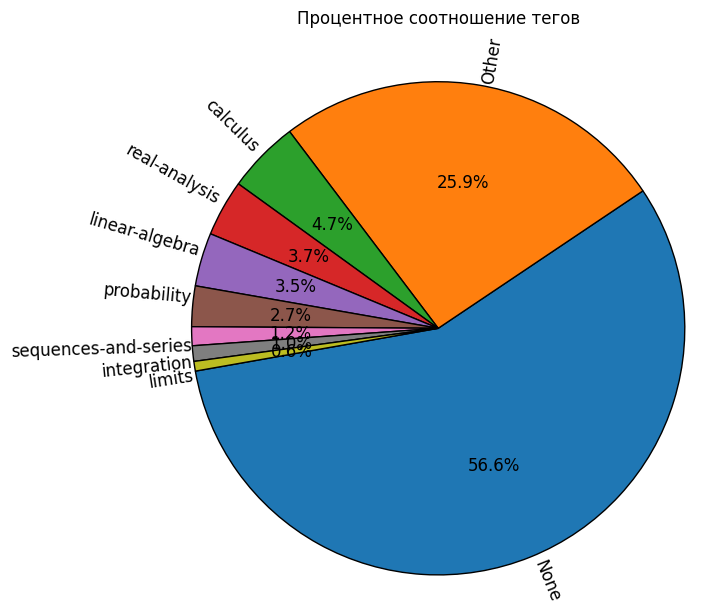

In [33]:
# на первой итерации не было информации о формулах вне текстов/текстах с формулами
# ожидаемо около половины всех текстов оказались формулами (т.е. имели тег None по факту создания датасета)
tag_counts = df['tags'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(tag_counts, labels=tag_counts.index, autopct='%1.1f%%', startangle=190,
        labeldistance=1,  textprops={'fontsize': 12}, rotatelabels=True,  wedgeprops={'edgecolor': 'black'})
plt.title('Процентное соотношение тегов', y=1.05)
plt.axis('equal')
plt.show()

In [34]:
# сплит выборок 80/15/5
train_dataset, test_dataset = train_test_split(df, test_size=0.05,stratify=df['tags'] ,random_state=1)
train_dataset, val_dataset = train_test_split(train_dataset,test_size=0.1425, stratify=train_dataset['tags'],random_state=1)

print("Training data size: {}".format(len(train_dataset)))
print("Validation data size: {}".format(len(val_dataset)))
print("Testing data size: {}".format(len(test_dataset)))


Training data size: 281762
Validation data size: 46824
Testing data size: 17295


In [35]:
train_dataset.head()

,output_texts,input_texts,tags
218974,"Я думаю, вы попытались оценить не ту часть дро...","Я думаю, вы попытались оценить не ту часть дро...",real-analysis
14147,"**Прошу прощения за избегание подробностей, но...","**Прошу прощения за избегание подробностей, но...",Other
291591,$$\frac{xy}{6x+y}+\frac{yz}{3y+4z}+\frac{zx}{z...,$$дробь от xy делить на 6 икс + игЩик +yz разд...,None
92202,"$$y_3 \geq \begin{cases} 1 & \text{if } (y_1, ...",$$ у с индексом 3 \geq \begin{cases} 1 & \tex...,None
341087,"Учитывая тот факт, что $n$ и $k$ обычно исполь...","Учитывая тот факт, что $ эн $ и $ кей $ обычно...",Other


In [36]:
train_dataset = CustomDataset(train_dataset, tokenizer)
#test_dataset = CustomDataset(test_dataset, tokenizer)
val_dataset = CustomDataset(val_dataset, tokenizer)

In [37]:
for item in train_dataset[3]:
    print(item)
    print(len(train_dataset[3][item]))
   

input_ids
118
attention_mask
118
labels
118


In [38]:
BATCH_SIZE=40

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, pin_memory=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=False)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

In [39]:
from tqdm.auto import tqdm
from transformers import get_scheduler

In [40]:
%%time
# основная часть -- training/eval loops
epochs = 5
train_losses = []
val_losses = []
edit_scores = []

for epoch in range(epochs):
    # обучение
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader, desc=f'train epoch {epoch + 1}/{epochs}'):
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'train loss: {avg_train_loss}')

    # валидация
    model.eval()
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f'val epoch {epoch + 1}/{epochs}'):
            #print(batch)
            for item in batch:
                batch[item]=batch[item].to(device)
            #print(batch)
            outputs = model(**batch)
            
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())
            
            
        val_loss = outputs.loss
        val_losses.append(val_loss.item())
    
    print(f'val loss: {val_loss.item()}')

train epoch 1/5:   0%|          | 0/7045 [00:00<?, ?it/s]

train loss: 0.9198875668033629


val epoch 1/5:   0%|          | 0/1171 [00:00<?, ?it/s]

val loss: 0.4106210768222809


train epoch 2/5:   0%|          | 0/7045 [00:00<?, ?it/s]

train loss: 0.3686039370735162


val epoch 2/5:   0%|          | 0/1171 [00:00<?, ?it/s]

val loss: 0.30648159980773926


train epoch 3/5:   0%|          | 0/7045 [00:00<?, ?it/s]

train loss: 0.29009544919829916


val epoch 3/5:   0%|          | 0/1171 [00:00<?, ?it/s]

val loss: 0.2606971561908722


train epoch 4/5:   0%|          | 0/7045 [00:00<?, ?it/s]

train loss: 0.2548345448067207


val epoch 4/5:   0%|          | 0/1171 [00:00<?, ?it/s]

val loss: 0.23480837047100067


train epoch 5/5:   0%|          | 0/7045 [00:00<?, ?it/s]

train loss: 0.23409791655621687


val epoch 5/5:   0%|          | 0/1171 [00:00<?, ?it/s]

val loss: 0.216606006026268
CPU times: user 6h 39min 22s, sys: 53min 37s, total: 7h 33min
Wall time: 7h 27min 40s


In [41]:
import gc
torch.cuda.empty_cache()
gc.collect()

7487

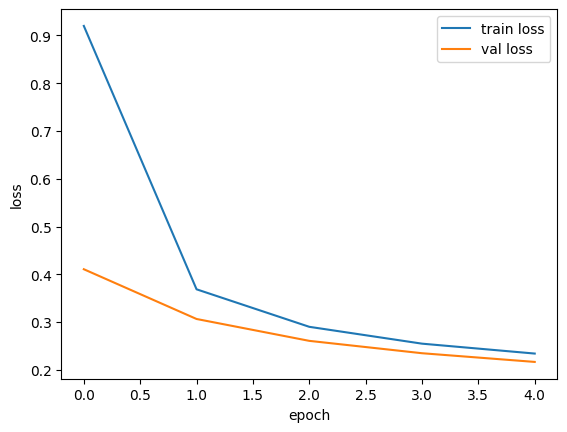

In [44]:
from matplotlib import pyplot as plt
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
import os 
output_dir = "/kaggle/working/finetuned_model"

model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

test_dir = os.path.join(output_dir, "test")
os.makedirs(test_dir, exist_ok=True)
test_dataset.to_parquet(os.path.join(test_dir, "test_ds.parquet"))

In [46]:
import shutil
from datetime import datetime

shutil.make_archive(f"ft_mod_{datetime.now().strftime('%d_%m_%Y')}", 'zip', output_dir)

'/kaggle/working/ft_mod_22_04_2024.zip'

In [47]:
# примеры метрики нормализованного сходства левенштейна
ex_metr = (
    ("aaa","aaa"),
    ("aab","aba"),
    ("I went to school", "I went  to school"),
    ("Я не люблю кушать дома", "я не лблю кушать дмаю"),
    ("$\int_{3}^5 / k} &varphi$", "$\int_{3}^{5} \\varphi$")
)

for ex in ex_metr:
    al_lev = Levenshtein.normalized_similarity(ex[0], ex[1])
    print(f"Схожесть между \"{ex[0]}\" и \"{ex[1]}\": {al_lev}")

Схожесть между "aaa" и "aaa": 1.0
Схожесть между "aab" и "aba": 0.33333333333333337
Схожесть между "I went to school" и "I went  to school": 0.9411764705882353
Схожесть между "Я не люблю кушать дома" и "я не лблю кушать дмаю": 0.8181818181818181
Схожесть между "$\int_{3}^5 / k} &varphi$" и "$\int_{3}^{5} \varphi$": 0.76


In [48]:
# результаты на первой итерации 
text = '$ интеграл от 3 до 5 \phi '
inputs = tokenizer(text, return_tensors='pt').to('cuda')

with torch.no_grad():
    hypotheses = model.generate(
        **inputs, 
        do_sample=True, top_p=0.95, num_return_sequences=10, 
        repetition_penalty=2.2,
        max_length=len(text),
    )
for h in hypotheses:
    print(tokenizer.decode(h, skip_special_tokens=True))

$\int_{3}^5 - \varphi$
$\int_{3}^5  \varphi }$
$\int_{3}^{5 \varphi }$
$\int_{3}^5  \varphi
$\int_{3}^5 -, \varphi
$\int_{3}^2 - 5 + 4, u| =
$\int_{3}^5 \varphi < 3$
$\int_{3}^5 = 5 -
$\int_{3}^{5 - 3 }$
$\int_{3}^5, \varphi - z$


In [49]:
print(f"Количество семплов: {len(df)}")
print(f"Размер контекстного окна: {med_len}")
print(f"Количество эпох: {epochs}")
print(f"Размер батчей: {BATCH_SIZE}")

Количество семплов: 345881
Размер контекстного окна: 118.0
Количество эпох: 5
Размер батчей: 40
